<a href="https://colab.research.google.com/github/KodakV/Case_cup/blob/master/Cup_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# необходимые модули
import torch
import random
import numpy as np
import pandas as pd
import json
import base64
import os
import pylab
import torchvision
import shutil
import matplotlib.pyplot as plt
from torchvision import transforms, models
from tqdm import tqdm
import cv2
import pylab
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
!rm -rf 'train'
!rm -rf 'test'
!rm -rf 'val'
!rm -rf 'val_json'
!rm -rf 'train_json'
!rm -rf 'val_png'


In [ ]:
# подключение гугл диска
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# создание необходимых директорий
LABELS = ['c_kefir', 'ent_cloacae', 'klebsiella_pneumoniae', 'moraxella_catarrhalis',
          'staphylococcus_aureus', 'staphylococcus_epidermidis']
# LABELS = ['staphylococcus_epidermidis', 'klebsiella_pneumoniae', 'staphylococcus_aureus', 'moraxella_catarrhalis',
#           'c_kefir', 'ent_cloacae']
train_dir = '/content/drive/My Drive/dataset_its/train/'
test_dir='/content/drive/My Drive/dataset_its/test/'
val_dir='/content/val/'
new_train_dir='/content/train/'

os.makedirs('/content/train/')
for dir in LABELS:
  current_dir='/content/train/'+'{cat}/'.format(cat=dir)
  os.makedirs(current_dir)

os.makedirs('/content/test/')
os.makedirs('/content/test/unknown/')

os.makedirs('/content/val/')
for dir in LABELS:
  current_dir='/content/val/'+'{cat}/'.format(cat=dir)
  os.makedirs(current_dir)

os.makedirs('/content/val_json')

os.makedirs('/content/val_png')


In [ ]:
# копирование в необходимые директории (train)
val_part=5
number_train_photo=int(len(os.listdir(train_dir))/2)
FILE_FILTER=['.png','.json']
for index in range(1,number_train_photo+1): 
    if index<10:
      number="00{index}".format(index=index)
      current='/content/drive/My Drive/dataset_its/train/'+number
      print(current)
    elif index<100 and index>=10:
      number="0{index}".format(index=index)
      current='/content/drive/My Drive/dataset_its/train/'+number
      print(current)
    elif index>=100:
      number='{index}'.format(index=index)
      current='/content/drive/My Drive/dataset_its/train/'+number
      print(current)

    if index%val_part!=0:
      with open(current+FILE_FILTER[1], 'r', encoding='utf-8') as fh: #открываем файл на чтение
        data = json.load(fh) #загружаем из файл а данные в словарь data
        class_photo=data['shapes'][0]['label']
        train_path='/content/train/'+'{path}/'.format(path=class_photo)
        shutil.copy(train_dir+number+FILE_FILTER[0], train_path)
    else:
      with open(current+FILE_FILTER[1], 'r', encoding='utf-8') as fh: #открываем файл на чтение
        data = json.load(fh) #загружаем из файл а данные в словарь data
        class_photo=data['shapes'][0]['label']
        val_path='/content/val/'+'{path}/'.format(path=class_photo)
        val_json_path='/content/val_json/'
        val_png_path='/content/val_png/'
        print(val_path)
        shutil.copy(train_dir+number+FILE_FILTER[0], val_path)
        shutil.copy(train_dir+number+FILE_FILTER[0], val_png_path)
        shutil.copy(train_dir+number+FILE_FILTER[1], val_json_path)





/content/drive/My Drive/dataset_its/train/001
/content/drive/My Drive/dataset_its/train/002
/content/drive/My Drive/dataset_its/train/003
/content/drive/My Drive/dataset_its/train/004
/content/drive/My Drive/dataset_its/train/005
/content/val/c_kefir/
/content/drive/My Drive/dataset_its/train/006
/content/drive/My Drive/dataset_its/train/007
/content/drive/My Drive/dataset_its/train/008
/content/drive/My Drive/dataset_its/train/009
/content/drive/My Drive/dataset_its/train/010
/content/val/c_kefir/
/content/drive/My Drive/dataset_its/train/011
/content/drive/My Drive/dataset_its/train/012
/content/drive/My Drive/dataset_its/train/013
/content/drive/My Drive/dataset_its/train/014
/content/drive/My Drive/dataset_its/train/015
/content/val/c_kefir/
/content/drive/My Drive/dataset_its/train/016
/content/drive/My Drive/dataset_its/train/017
/content/drive/My Drive/dataset_its/train/018
/content/drive/My Drive/dataset_its/train/019
/content/drive/My Drive/dataset_its/train/020
/content/val/c

In [ ]:
# копирование в необходимые директории (test)
number_test_photo=int(len(os.listdir(test_dir)))
for index in range(1,number_test_photo+1): 
    if index<10:
      number="00{index}".format(index=index)
      current='/content/drive/My Drive/dataset_its/test/'+number
      print(current)
    elif index<100 and index>=10:
      number="0{index}".format(index=index)
      current='/content/drive/My Drive/dataset_its/test/'+number
      print(current)
    elif index>=100:
      number='{index}'.format(index=index)
      current='/content/drive/My Drive/dataset_its/test/'+number
    test_path='/content/test/unknown/'
    shutil.copy(test_dir+number+FILE_FILTER[0], test_path)

/content/drive/My Drive/dataset_its/test/001
/content/drive/My Drive/dataset_its/test/002
/content/drive/My Drive/dataset_its/test/003
/content/drive/My Drive/dataset_its/test/004
/content/drive/My Drive/dataset_its/test/005
/content/drive/My Drive/dataset_its/test/006
/content/drive/My Drive/dataset_its/test/007
/content/drive/My Drive/dataset_its/test/008
/content/drive/My Drive/dataset_its/test/009
/content/drive/My Drive/dataset_its/test/010
/content/drive/My Drive/dataset_its/test/011
/content/drive/My Drive/dataset_its/test/012
/content/drive/My Drive/dataset_its/test/013
/content/drive/My Drive/dataset_its/test/014
/content/drive/My Drive/dataset_its/test/015
/content/drive/My Drive/dataset_its/test/016
/content/drive/My Drive/dataset_its/test/017
/content/drive/My Drive/dataset_its/test/018
/content/drive/My Drive/dataset_its/test/019
/content/drive/My Drive/dataset_its/test/020
/content/drive/My Drive/dataset_its/test/021
/content/drive/My Drive/dataset_its/test/022
/content/d

In [ ]:
train_transforms1 = transforms.Compose([
    transforms.Resize((512, 640)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_transforms2 = transforms.Compose([
    transforms.Resize((512, 640)),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_transforms3 = transforms.Compose([
    transforms.Resize((512, 640)),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_transforms4 = transforms.Compose([
    transforms.Resize((512, 640)),
    transforms.RandomRotation(degrees=100),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_transforms5 = transforms.Compose([
    transforms.Resize((512, 640)),
    transforms.RandomRotation(degrees=340),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_transforms6 = transforms.Compose([
    transforms.Resize((512, 640)),
    transforms.ColorJitter(0.5, 0.5, 0.0, 0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_transforms7 = transforms.Compose([
    transforms.Resize((512, 640)),
    transforms.ColorJitter(0.3, 0.3, 0.0, 0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
train_transforms8 = transforms.Compose([
    transforms.Resize((512, 640)),
    transforms.ColorJitter(0.3, 0.3, 0.0, 0.2),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
val_transforms = transforms.Compose([
    transforms.Resize((512, 640)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset_1 = torchvision.datasets.ImageFolder(new_train_dir, train_transforms1)
train_dataset_2 = torchvision.datasets.ImageFolder(new_train_dir, train_transforms2)
train_dataset_3 = torchvision.datasets.ImageFolder(new_train_dir, train_transforms3)
train_dataset_4 = torchvision.datasets.ImageFolder(new_train_dir, train_transforms4)
train_dataset_5 = torchvision.datasets.ImageFolder(new_train_dir, train_transforms5)
train_dataset_6 = torchvision.datasets.ImageFolder(new_train_dir, train_transforms6)
train_dataset_7 = torchvision.datasets.ImageFolder(new_train_dir, train_transforms7)
train_dataset_8 = torchvision.datasets.ImageFolder(new_train_dir, train_transforms8)

# train_dataset = torch.utils.data.ConcatDataset([train_dataset_1])
# train_dataset = torch.utils.data.ConcatDataset([train_dataset_1,train_dataset_2,train_dataset_3,train_dataset_4,train_dataset_5])
train_dataset = torch.utils.data.ConcatDataset([train_dataset_1,train_dataset_2,train_dataset_3,train_dataset_4,train_dataset_5,train_dataset_6,train_dataset_7,train_dataset_8])
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 16
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
class ImageFolderWithPaths(torchvision.datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path



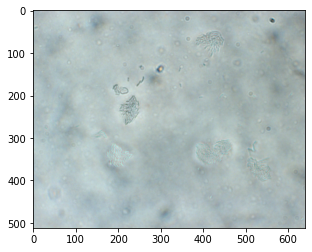

In [ ]:
X_batch, y_batch = next(iter(train_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean);

In [ ]:
def train_model(model, loss, optimizer, scheduler, num_epochs):
    train_loss=[]
    train_accuracy=[]
    val_loss=[]
    val_accuracy=[]
    for epoch in range(num_epochs):

#         print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)
            if phase=='train':
                train_loss.append(epoch_loss)
                train_accuracy.append(epoch_acc)
            else:
                val_loss.append(epoch_loss)
                val_accuracy.append(epoch_acc)
            #print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)
#     print('train_loss ',train_loss)
    #graphics
    pylab.subplot(1,2,1)
    plt.plot(train_accuracy, label='val_accuracy')
    plt.plot(val_accuracy, label='train_accuracy')
    plt.title('accuracy')
    plt.legend()
    pylab.subplot(1,2,2)
    plt.plot(train_loss, label='val_loss')
    plt.plot(val_loss, label='train_loss')
    plt.title('loss')
    plt.legend()
    return model


In [ ]:
model = models.resnet50(pretrained=True)
# model = models.googlenet(pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'vgg11', pretrained=True)
n_classes=6
# Disable grad for all conv layers
for param in model.parameters():
    param.requires_grad = False
print(model.fc.in_features)

model.fc = torch.nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 1024),
    torch.nn.Sigmoid(),
    torch.nn.Linear(1024, 6),
    # torch.nn.ReLU(),
    # torch.nn.Linear(512, 6),
    # torch.nn.ReLU(),
    # torch.nn.Linear(256, 6),

)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

2048


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=15);

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
 40%|████      | 42/105 [00:24<00:38,  1.64it/s]

In [ ]:
model.eval()

val_predictions = []
val_predictions_arg=[]

for inputs, labels in tqdm(val_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
        # print('preds',preds)
        # print('argmax',preds.argmax(dim=1))
    val_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:,1].data.cpu().numpy())
    val_predictions_arg.append(preds.argmax(dim=1).data.cpu().numpy())

    
val_predictions = np.concatenate(val_predictions)
val_predictions_arg=np.concatenate(val_predictions_arg)
print(val_predictions[0])
print(val_predictions_arg)


In [ ]:
val_id=[i*val_part for i in range(1,int((len(os.listdir('/content/val_json')))+1))]
val_submission_df = pd.DataFrame.from_dict({'id': val_id, 'class': val_predictions_arg})
val_submission_df['class'] = val_submission_df['class'].map(lambda pred: LABELS[pred])
val_submission_df.set_index('id', inplace=True)
val_submission_df.to_csv('val_submission.csv')
print(val_submission_df)

In [ ]:
DATASET_PATH = '/content/val_json'

label_metrics = np.zeros((len(LABELS), len(LABELS)), int)
df = pd.read_csv('val_submission.csv')
def set_metrics(filename):
    global label_metrics, df
    with open(os.path.join(DATASET_PATH, filename), 'r') as f:
        layout = json.load(f)
    h, w = layout['imageHeight'], layout['imageWidth']
    label = layout['shapes'][0]['label']
    ind = int((int(filename[:-len(FILE_FILTER[1])])-1)/val_part)
    new_label = df.at[ind, 'class']
    label_metrics[LABELS.index(new_label)][LABELS.index(label)] += 1

def calculate_metrics():

    precisions = dict.fromkeys(LABELS, 0.)
    for label in LABELS:
        i = LABELS.index(label)
        precisions[label] = label_metrics[i][i] / np.sum(label_metrics[i, :])
    mean_precision = np.mean(list(precisions.values()))

    score = np.sum(list(precisions.values()))


    for k, v in precisions.items():
        print(f'precision_{k}: {v}')
    print(f'mean_precision: {mean_precision}\nscore: {score}')


def main():
    files = os.listdir(DATASET_PATH)
    for file in sorted(filter(lambda x: x[-len(FILE_FILTER[1]):].lower() == FILE_FILTER[1], files)):
      set_metrics(file)
    calculate_metrics()


main()

In [ ]:
    
test_dataset = ImageFolderWithPaths('/content/test', val_transforms)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [ ]:
model.eval()

test_predictions = []
test_predictions_arg=[]
test_img_paths = []
for inputs, labels, paths in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
        # print('preds',preds)
        # print('argmax',preds.argmax(dim=1))
    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:,1].data.cpu().numpy())
    test_predictions_arg.append(preds.argmax(dim=1).data.cpu().numpy())
    test_img_paths.extend(paths)
    
test_predictions = np.concatenate(test_predictions)
test_predictions_arg=np.concatenate(test_predictions_arg)


In [ ]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)


inputs, labels, paths = next(iter(test_dataloader))

for img, pred in zip(inputs, test_predictions_arg):
    show_input(img, title=pred)

In [ ]:
average_medium=[3,5,7,9,11,13,15]
average_area=[3,5,7,9,11,13,15]
C=[1,2,3,4]
config=[]
for medium in average_medium:
  for area in average_area:
    for const in C:
      config.append([medium,area,const])
# max_config=config[2]
max_config=[config[35],config[7],config[3],config[2],config[2],config[3]]


In [ ]:
var=['test','val']
flag=var[0]

In [ ]:
if flag=='test':
  class_list=list(map(lambda pred: LABELS[pred],test_predictions_arg))
  id_list=test_img_paths
  id_list=list(map(lambda x: x.replace('/content/test/unknown/', ''),id_list))
else:
  class_list=list(map(lambda pred: LABELS[pred],val_predictions_arg))
  id_list=sorted([i for  i in os.listdir('/content/val_png')])
dictionary = dict(zip(id_list, class_list))


In [ ]:
  #  0.44
    # mask = cv2.erode (mask, kernel_3, iterations = 1)
    # mask = cv2.dilate(mask,kernel_7,iterations = 1)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_5)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_5)
  # 0.6
    # mask = cv2.Laplacian(mask,cv2.CV_64F)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_9)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_5)

  # 0.607
    # laplacian = cv2.Laplacian(mask,cv2.CV_64F)
    # H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
    # V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
    # mask=laplacian+H+V   
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_3, iterations=3)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_7)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_5, iterations=1)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_7)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_3, iterations=5)


In [ ]:
# сегментация для тестовых данных
import base64
!rm -rf 'test_masks'
!rm -rf 'val_masks'
import cv2
from google.colab.patches import cv2_imshow

kernel_2 = np.ones ((2,2), np.uint8)
kernel_3 = np.ones ((3,3), np.uint8)
kernel_5 = np.ones ((5,5), np.uint8)
kernel_7 = np.ones ((7,7), np.uint8)
kernel_9 = np.ones ((9,9), np.uint8)
kernel_11 = np.ones ((11,11), np.uint8)
kernel_13 = np.ones ((13,13), np.uint8)
kernel_15 = np.ones ((15,15), np.uint8)
array_of_mask_base64_array=[]

if flag=='test':
  config=[[0,0,0]]
  config=[[0,0,0]]
  config_kefir=max_config[0]
  config_cloacae=max_config[1]
  config_kleb=max_config[2]
  config_catarr=max_config[3]
  config_aur=max_config[4]
  config_epid=max_config[5]
  os.makedirs('/content/test_masks/')
  path='/content/test/unknown/'
  mask_path='/content/test_masks/'
else:
  # убрать когда перебор
  config=[[0,0,0]]
  config_kefir=max_config[0]
  config_cloacae=max_config[1]
  config_kleb=max_config[2]
  config_catarr=max_config[3]
  config_aur=max_config[4]
  config_epid=max_config[5]
  print(flag)
  print(len(config))
  os.makedirs('/content/val_masks/')
  path='/content/val_png/'
  mask_path='/content/val_masks/'
iter=0
for current_config in range(len(config)): 
  iter+=1
  if config!=max_config:
    current_area_medium,current_area_image,current_const=config[current_config]
  mask_base64_array=[]
  for file in sorted(os.listdir(path)): 
    # image = cv2.imread(path+'{file}'.format(file=file),0)
    # image_blur = cv2.medianBlur(image,area_medium)
    # mask1=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,area_image,const)
    # mask2=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,area_image,const)
    # mask=mask1+mask2
    # laplacian = cv2.Laplacian(mask,cv2.CV_64F)
    # H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
    # V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
    # all=laplacian+H+V+mask
        # нахождение congif
        # image = cv2.medianBlur(image,current_area_medium)
        # mask1=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,current_area_image,current_const)
        # mask2=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,current_area_image,current_const)
        # mask=mask1+mask2
        # laplacian = cv2.Laplacian(mask,cv2.CV_64F)
        # H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
        # V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
        # all=laplacian+H+V+mask
    if dictionary['{file}'.format(file=file)]=='c_kefir':
      # 35 config
      area_medium,area_image,const=config_kefir
      image = cv2.imread(path+'{file}'.format(file=file),0)
      image_blur = cv2.medianBlur(image,area_medium)
      mask1=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,area_image,const)
      mask2=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,area_image,const)
      mask=mask1+mask2
      laplacian = cv2.Laplacian(mask,cv2.CV_64F)
      H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
      V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
      all=laplacian+H+V+mask
      # print(file, 'c_kefir')
      mask_kefir=cv2.morphologyEx(all, cv2.MORPH_BLACKHAT, kernel_9, iterations=2) 
            # mask_kefir=cv2.morphologyEx(all, cv2.MORPH_BLACKHAT, kernel_7, iterations=2) 
      mask_kefir = cv2.morphologyEx(mask_kefir, cv2.MORPH_CLOSE, kernel_3, iterations=1)
      mask_kefir = cv2.morphologyEx(mask_kefir, cv2.MORPH_OPEN, kernel_3, iterations=2)
      mask=mask_kefir
      # cv2_imshow(image)
      # cv2_imshow(mask_kefir)
      # cv2_imshow(mask_kefir3)
      # cv2_imshow(mask_kefir2)

    elif dictionary['{file}'.format(file=file)]=='ent_cloacae':
      # 7 config
        area_medium,area_image,const=config_cloacae
        image = cv2.imread(path+'{file}'.format(file=file),0)
        image_blur = cv2.medianBlur(image,area_medium)
        mask1=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask2=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask=mask1+mask2
        laplacian = cv2.Laplacian(mask,cv2.CV_64F)
        H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
        V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
        all=laplacian+H+V+mask
        # print(file, 'ent_cloacae')
        mask_cloacae=cv2.morphologyEx(all, cv2.MORPH_TOPHAT, kernel_5, iterations=3) 
        # mask_cloacae = cv2.morphologyEx(mask_cloacae, cv2.MORPH_CLOSE, kernel_5, iterations=2) была
        mask_cloacae = cv2.morphologyEx(mask_cloacae, cv2.MORPH_CLOSE, kernel_5, iterations=1)
        # mask_cloacae = cv2.morphologyEx(mask_cloacae, cv2.MORPH_OPEN, kernel_3, iterations=1) была
        mask_cloacae = cv2.morphologyEx(mask_cloacae, cv2.MORPH_OPEN, kernel_5, iterations=1)
        mask=mask_cloacae
        # cv2_imshow(image)
        # cv2_imshow(mask_cloacae)
    elif dictionary['{file}'.format(file=file)]=='klebsiella_pneumoniae':
      # 3 config
        area_medium,area_image,const=config_kleb
        image = cv2.imread(path+'{file}'.format(file=file),0)
        image_blur = cv2.medianBlur(image,area_medium)
        mask1=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask2=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask=mask1+mask2
        laplacian = cv2.Laplacian(mask,cv2.CV_64F)
        H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
        V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
        all=laplacian+H+V+mask
        # print(file, 'klebsiella_pneumoniae')
        # mask_kleb=cv2.morphologyEx(mask, cv2.MORPH_BLACKHAT, kernel_3, iterations=2) 
        mask_kleb=cv2.morphologyEx(laplacian, cv2.MORPH_BLACKHAT, kernel_3, iterations=2) 
        mask_kleb = cv2.morphologyEx(mask_kleb, cv2.MORPH_CLOSE, kernel_3, iterations=2)
        mask_kleb = cv2.morphologyEx(mask_kleb, cv2.MORPH_OPEN, kernel_5, iterations=1)
        mask=mask_kleb
        # cv2_imshow(image
        # cv2_imshow(mask_kleb)
    elif dictionary['{file}'.format(file=file)]=='moraxella_catarrhalis':
        # print(file, 'moraxella_catarrhalis')
        # 2config
        area_medium,area_image,const=config_catarr
        image = cv2.imread(path+'{file}'.format(file=file),0)
        image_blur = cv2.medianBlur(image,area_medium)
        mask1=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask2=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask=mask1+mask2
        laplacian = cv2.Laplacian(mask,cv2.CV_64F)
        H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
        V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
        all=laplacian+H+V+mask
        mask_catarr=cv2.morphologyEx(all, cv2.MORPH_BLACKHAT, kernel_3, iterations=2) 
        # mask_catarr=cv2.morphologyEx(laplacian, cv2.MORPH_BLACKHAT, kernel_3, iterations=2) 
        mask_catarr = cv2.morphologyEx(mask_catarr, cv2.MORPH_CLOSE, kernel_3, iterations=2)
        mask_catarr = cv2.morphologyEx(mask_catarr, cv2.MORPH_OPEN, kernel_3, iterations=1)
        mask=mask_catarr
        # cv2_imshow(image)
        # cv2_imshow(mask_catarr)
    elif dictionary['{file}'.format(file=file)]=='staphylococcus_aureus':
      # 2 config 
        area_medium,area_image,const=config_aur
        image = cv2.imread(path+'{file}'.format(file=file),0)
        image_blur = cv2.medianBlur(image,area_medium)
        mask1=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask2=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask=mask1+mask2
        laplacian = cv2.Laplacian(mask,cv2.CV_64F)
        H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
        V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
        all=laplacian+H+V+mask
        # print(file, 'staphylococcus_aureus')
        mask_aur=cv2.morphologyEx(all, cv2.MORPH_BLACKHAT, kernel_3, iterations=1) 
        # mask_aur2=cv2.morphologyEx(laplacian, cv2.MORPH_BLACKHAT, kernel_3, iterations=2) 
        mask_aur = cv2.morphologyEx(mask_aur, cv2.MORPH_CLOSE, kernel_3, iterations=2)
        mask_aur = cv2.morphologyEx(mask_aur, cv2.MORPH_OPEN, kernel_5, iterations=1)
        mask=mask_aur
        # cv2_imshow(image)
        # cv2_imshow(mask_aur)
    elif dictionary['{file}'.format(file=file)]=='staphylococcus_epidermidis':
      # 3 config
        area_medium,area_image,const=config_epid
        image = cv2.imread(path+'{file}'.format(file=file),0)
        image_blur = cv2.medianBlur(image,area_medium)
        mask1=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask2=cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,area_image,const)
        mask=mask1+mask2
        laplacian = cv2.Laplacian(mask,cv2.CV_64F)
        H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
        V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
        all=laplacian+H+V+mask
        # print(file, 'staphylococcus_epidermidis')
        mask_epid=cv2.morphologyEx(all, cv2.MORPH_BLACKHAT, kernel_3, iterations=1) 
        # mask_epid = cv2.morphologyEx(mask_epid, cv2.MORPH_CLOSE, kernel_3, iterations=2)
        # mask_epid = cv2.morphologyEx(mask_epid, cv2.MORPH_OPEN, kernel_5, iterations=1)
        mask_epid = cv2.morphologyEx(mask_epid, cv2.MORPH_CLOSE, kernel_3, iterations=2)
        mask_epid = cv2.morphologyEx(mask_epid, cv2.MORPH_OPEN, kernel_5, iterations=1)
        mask=mask_epid
        # cv2_imshow(image)
        # cv2_imshow(mask_epid)
    # if file=='005.png':
    #   laplacian = cv2.Laplacian(mask,cv2.CV_64F)
    #   H = cv2.Sobel(mask, cv2.CV_8U, 0, 1)
    #   V = cv2.Sobel(mask, cv2.CV_8U, 1, 0)
    #   all=laplacian+H+V
    #   mask1 = cv2.Laplacian(mask,cv2.CV_64F)
    #   mask2=cv2.morphologyEx(all, cv2.MORPH_TOPHAT, kernel_3, iterations=1)
    #   mask3=cv2.morphologyEx(all, cv2.MORPH_BLACKHAT, kernel_5, iterations=2)

    # print(file)
    cv2.imwrite('/content/current.png', mask)
    with open("/content/current.png", "rb") as image_file:
      encoded_string = base64.b64encode(image_file.read())
      new_encoded_string=encoded_string.decode('utf-8')
      mask_base64_array.append(new_encoded_string)
  array_of_mask_base64_array.append(mask_base64_array)    
  print(iter,"шаг из ", len(config))




In [ ]:
import base64

# mask_base64_array=[]
# array_of_mask_base64_array=[]
# for file in sorted(os.listdir(mask_path)): 
#   with open(mask_path+'{file}'.format(file=file), "rb") as image_file:
#       encoded_string = base64.b64encode(image_file.read())
#       new_encoded_string=encoded_string.decode('utf-8')
#       mask_base64_array.append(new_encoded_string)
# print(len(mask_base64_array))

# for current_array_of_mask_array in array_of_mask_array:
#   mask_base64_array=[]
#   for current_mask_array in current_array_of_mask_array:
#     encoded_string=base64.b64encode(current_mask_array)
#     new_encoded_string=encoded_string.decode('utf-8')
#     mask_base64_array.append(new_encoded_string)
#   mask_base64_array=np.array(mask_base64_array)
#   array_of_mask_base64_array.append(mask_base64_array)
# array_of_mask_base64_array=np.array(array_of_mask_base64_array)
# print(array_of_mask_base64_array[0][0])

# with open('check.png', 'wb') as fp:
#   fp.write(base64.b64decode(array_of_mask_base64_array[0][0].encode()))
# mask = cv2.imread('check.png', 0)
# print(type(mask))


In [ ]:
# print(os.listdir('/content/test/unknown'))
# for file in sorted(os.listdir('/content/test/unknown')):
#   print(file)
print(test_img_paths)

In [ ]:
# test_img_paths=list(i+1 for i in range(len(test_img_paths)))

In [ ]:
segmentation=['main','import']
flag_segmentation=segmentation[0]

In [ ]:
if flag=='test':
  if flag_segmentation=='main':
    submission_df = pd.DataFrame.from_dict({'id': test_img_paths, 'class': test_predictions_arg,'base64 encoded PNG (mask)':mask_base64_array})
  else:
    base64=pd.read_csv('/content/base_64submission.csv')
    masks=base64['base64 encoded PNG (mask)']
    submission_df = pd.DataFrame.from_dict({'id': test_img_paths, 'class': test_predictions_arg,'base64 encoded PNG (mask)':masks})
else:
  val_submission_df['base64 encoded PNG (mask)']=array_of_mask_base64_array[0]
  val_submission_df.to_csv('val_submission_segmentation.csv')
  


In [ ]:
if flag=='test':
  class_list=list(map(lambda pred: LABELS[pred],test_predictions_arg))
  id_list=test_img_paths
  id_list=list(map(lambda x: x.replace('/content/test/unknown/', ''),id_list))
else:
  class_list=list(map(lambda pred: LABELS[pred],val_predictions_arg))
  id_list=sorted([i for  i in os.listdir('/content/val_png')])
dictionary = dict(zip(id_list, class_list))



In [ ]:
if flag=='test':
  # submission_df['label'] = submission_df['label'].map(lambda pred: 'dirty' if pred > 0.57 else 'cleaned')
  submission_df['class'] = submission_df['class'].map(lambda pred: LABELS[pred])
  submission_df['id'] = submission_df['id'].str.replace('/content/test/unknown/', '')
  submission_df['id'] = submission_df['id'].str.replace('.png', '')
  submission_df.set_index('id', inplace=True)
  # submission_df.set_index('id')
  print(submission_df.head(n=20))
  submission_df.to_csv('submission.csv')


In [ ]:
# метрика
DATASET_PATH = '/content/val_json'
array_mean=[]
for current_mask_base64_array in array_of_mask_base64_array:
  val_submission_df['base64 encoded PNG (mask)']=current_mask_base64_array
  val_submission_df.to_csv('val_submission_segmentation.csv')
  label_metrics = np.zeros((len(LABELS), len(LABELS)), int)
  seg_metrics = []
  df = pd.read_csv('val_submission_segmentation.csv')
  def set_metrics(filename):
      global label_metrics, seg_metrics, df

      with open(os.path.join(DATASET_PATH, filename), 'r') as f:
          layout = json.load(f)

      h, w = layout['imageHeight'], layout['imageWidth']
      true_mask = np.zeros((h, w), np.uint8)
      label = layout['shapes'][0]['label']

      for shape in layout['shapes']:
          polygon = np.array([point[::-1] for point in shape['points']])
          cv2.fillPoly(true_mask, [polygon[:, [1, 0]]], 255)

      ind = int((int(filename[:-len(FILE_FILTER[1])])-1)/val_part)
      new_label = df.at[ind, 'class']
      label_metrics[LABELS.index(new_label)][LABELS.index(label)] += 1

      with open('tmp_bacteria.png', 'wb') as fp:
          fp.write(base64.b64decode(df.at[ind, 'base64 encoded PNG (mask)'].encode()))
      mask = cv2.imread('tmp_bacteria.png', 0)
      seg_metrics += [np.count_nonzero(np.logical_and(true_mask, mask)) /
                      np.count_nonzero(np.logical_or(true_mask, mask))]
  def calculate_metrics():
      print(seg_metrics)
      mean_iou = np.mean(seg_metrics)
      array_mean.append(mean_iou)
      precisions = dict.fromkeys(LABELS, 0.)
      for label in LABELS:
          i = LABELS.index(label)
          precisions[label] = label_metrics[i][i] / np.sum(label_metrics[i, :])
      mean_precision = np.mean(list(precisions.values()))

      score = mean_iou + np.sum(list(precisions.values()))

      print(f'mean_iou: {mean_iou}')
      for k, v in precisions.items():
          print(f'precision_{k}: {v}')
      print(f'mean_precision: {mean_precision}\nscore: {score}')


  def main():
      files = os.listdir(DATASET_PATH)
      for file in sorted(filter(lambda x: x[-len(FILE_FILTER[1]):].lower() == FILE_FILTER[1], files)):
          set_metrics(file)
      calculate_metrics()


  main()
  del val_submission_df['base64 encoded PNG (mask)']
print(array_mean)

In [ ]:
print(array_mean.index(max(array_mean)))
print(max(array_mean))
kefir=seg_metrics[0:14]
cloacae=seg_metrics[14:31]
kleb=seg_metrics[31:34]
catarr=seg_metrics[34:42]
aur=seg_metrics[42:46]
epid=seg_metrics[46:51]

print('kefir',np.mean(kefir))
print('cloacae',np.mean(cloacae))
print('kleb',np.mean(kleb))
print('catarr',np.mean(catarr))
print('aur',np.mean(aur))
print('epid',np.mean(epid))





In [ ]:
# print('type example', sample['id'].dtype,'type sabmisson', submission_df['id'].dtype  )
# print('type example', sample['class'].dtype ,'type sabmisson', submission_df['class'].dtype)
# print('type example', sample['base64 encoded PNG (mask)'].dtype ,'type sabmisson', submission_df['base64 encoded PNG (mask)'].dtype)


In [ ]:
# import io
# from imageio import imread
# temp_str=sample['base64 encoded PNG (mask)'][0]
# print(temp_str)
# img = imread(io.BytesIO(base64.b64decode(temp_str)))
# cv2_imshow(img)

In [ ]:
!rm -rf 'train_json'
!rm -rf 'train_png'
os.makedirs('/content/train_json')
os.makedirs('/content/train_png')

In [ ]:

number_train_photo=int(len(os.listdir(train_dir))/2)
FILE_FILTER=['.png','.json']
for index in range(1,number_train_photo+1): 
    if index<10:
      number="00{index}".format(index=index)
      current='/content/drive/My Drive/dataset_its/train/'+number
      print(current)
    elif index<100 and index>=10:
      number="0{index}".format(index=index)
      current='/content/drive/My Drive/dataset_its/train/'+number
      print(current)
    elif index>=100:
      number='{index}'.format(index=index)
      current='/content/drive/My Drive/dataset_its/train/'+number
      print(current)

      with open(current+FILE_FILTER[1], 'r', encoding='utf-8') as fh: #открываем файл на чтение
        data = json.load(fh) #загружаем из файл а данные в словарь data
        class_photo=data['shapes'][0]['label']
        train_path='/content/train/'+'{path}/'.format(path=class_photo)
        train_png_path='/content/train_png'
        train_png_json='/content/train_json'
        shutil.copy(train_dir+number+FILE_FILTER[0], train_png_path)
        shutil.copy(train_dir+number+FILE_FILTER[1], train_json_path)

In [ ]:


train_json_path='/content/train_json'
for filename in os.listdir(train_json_path):
    with open(os.path.join(train_json_path, filename), 'r') as f:
      layout = json.load(f)
    h, w = layout['imageHeight'], layout['imageWidth']
    true_mask = np.zeros((h, w), np.uint8)
    label = layout['shapes'][0]['label']
    for shape in layout['shapes']:
      polygon = np.array([point[::-1] for point in shape['points']])
      cv2.fillPoly(true_mask, [polygon[:, [1, 0]]], 255)
    cv2_imshow(true_mask)
